In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

plt.style.use('seaborn-poster')
%matplotlib inline

/var/folders/13/mjtvb_2933g9jbs42wdd3vdc0000gn/T/ipykernel_14176/3135520342.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


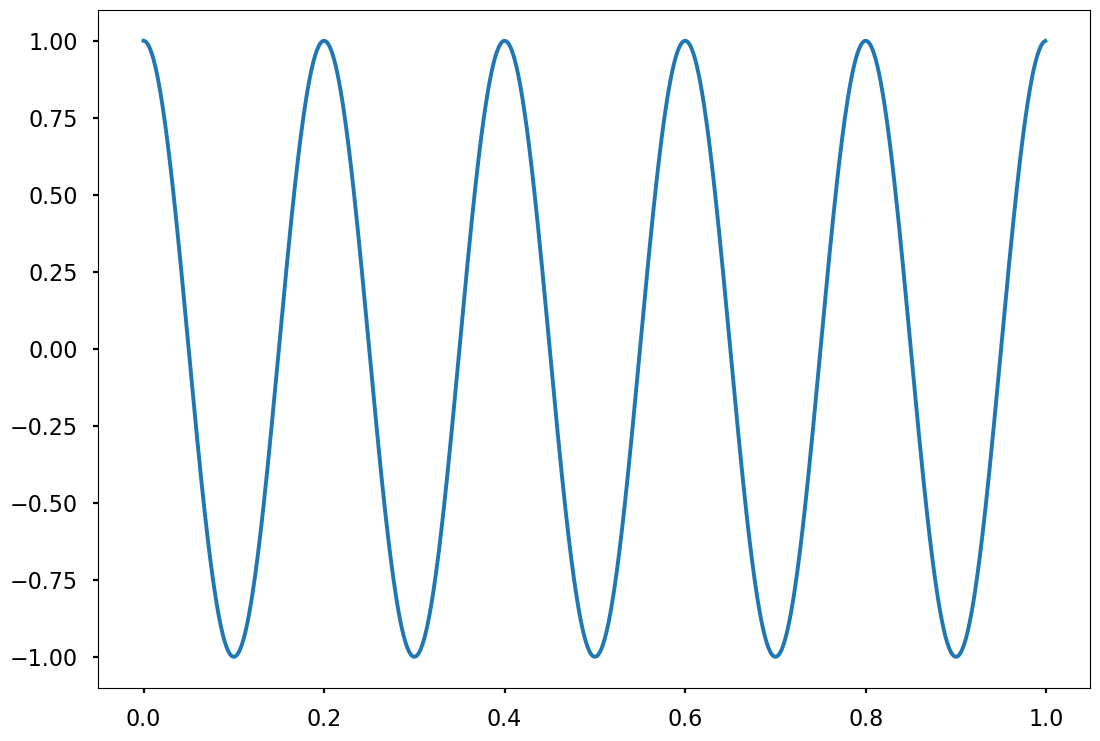

In [2]:
y = np.zeros(1000)
time = np.zeros(1000)

f = 5
for t in range (0, 1000):
    y[t] = np.cos(2 * math.pi * f * t /1000)
    time[t] = t/1000
plt.plot(time, y)
plt.show()

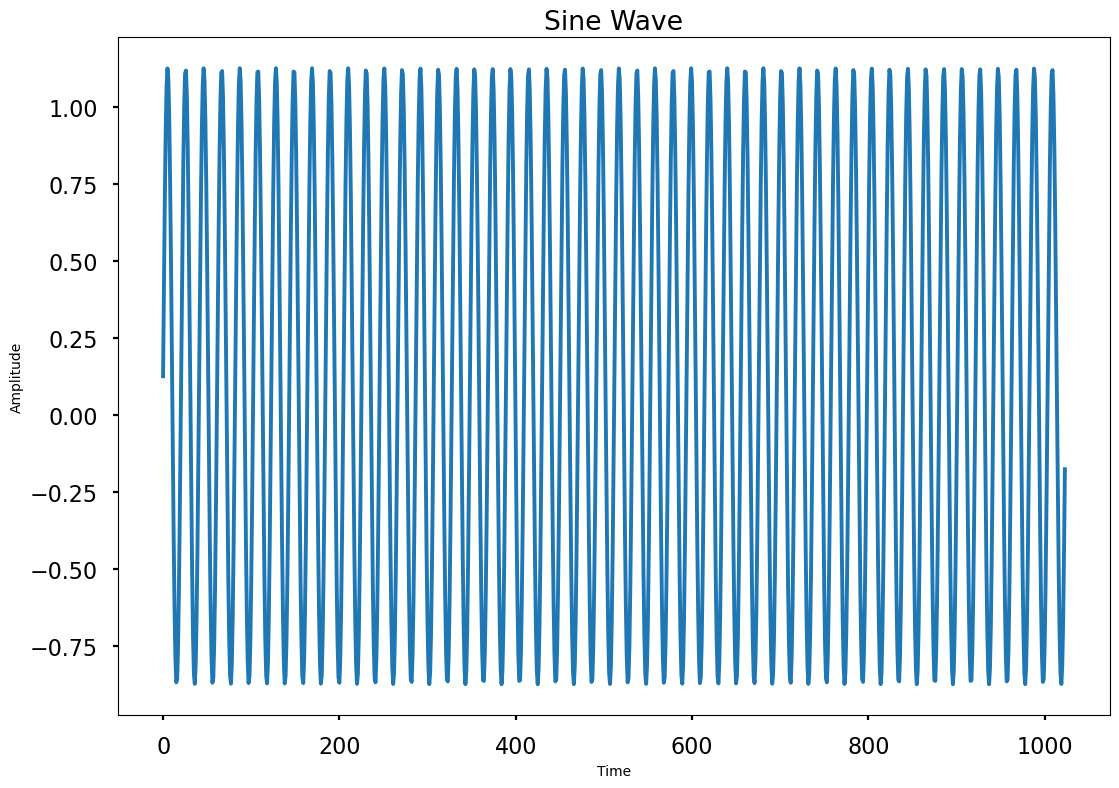

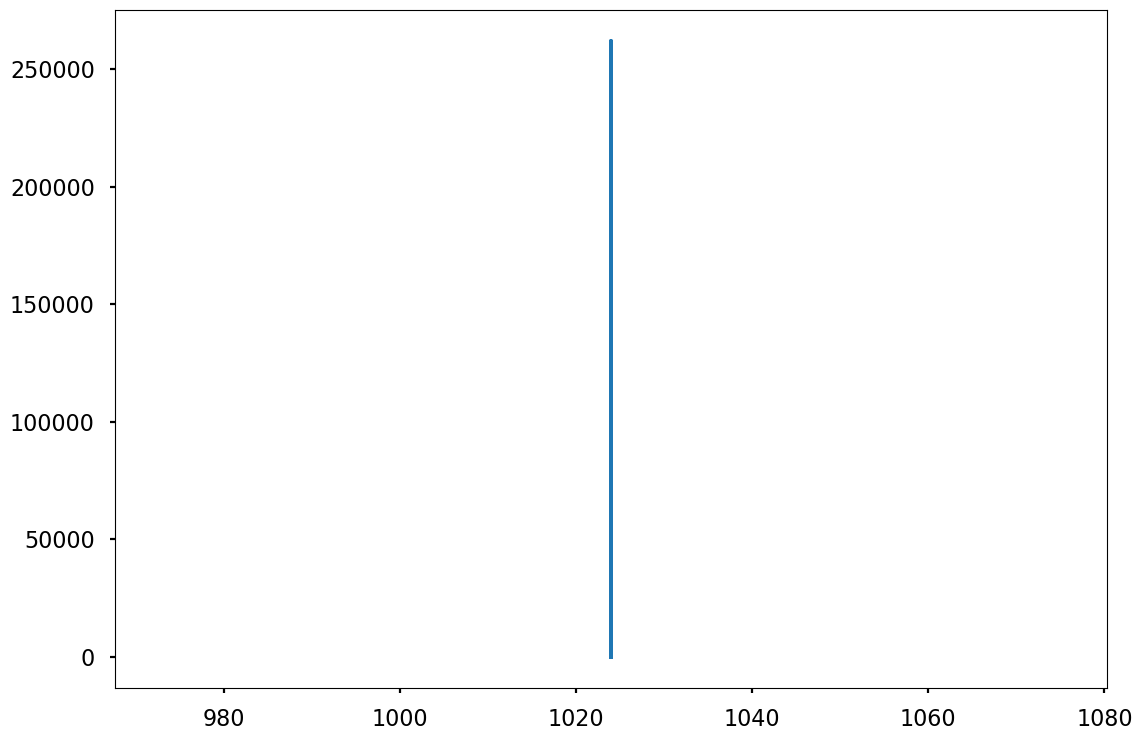

In [3]:
N = 1024 #ideadlly N should be a power of 2
y = np.zeros(N)
time = np.zeros(N)

f = 50

for t in range (0, N):
    y[t] = np.sin(2 * math.pi * f * t/N) + 1/8
    time[t] = t

plt.plot(time, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine Wave')
plt.show()

frequency = np.zeros(N)
for i in range (N):
    frequency[i] = N
fourier = np.fft.fft(y)
pspec = np.abs(fourier) ** 2

plt.plot(frequency, pspec)
plt.show()

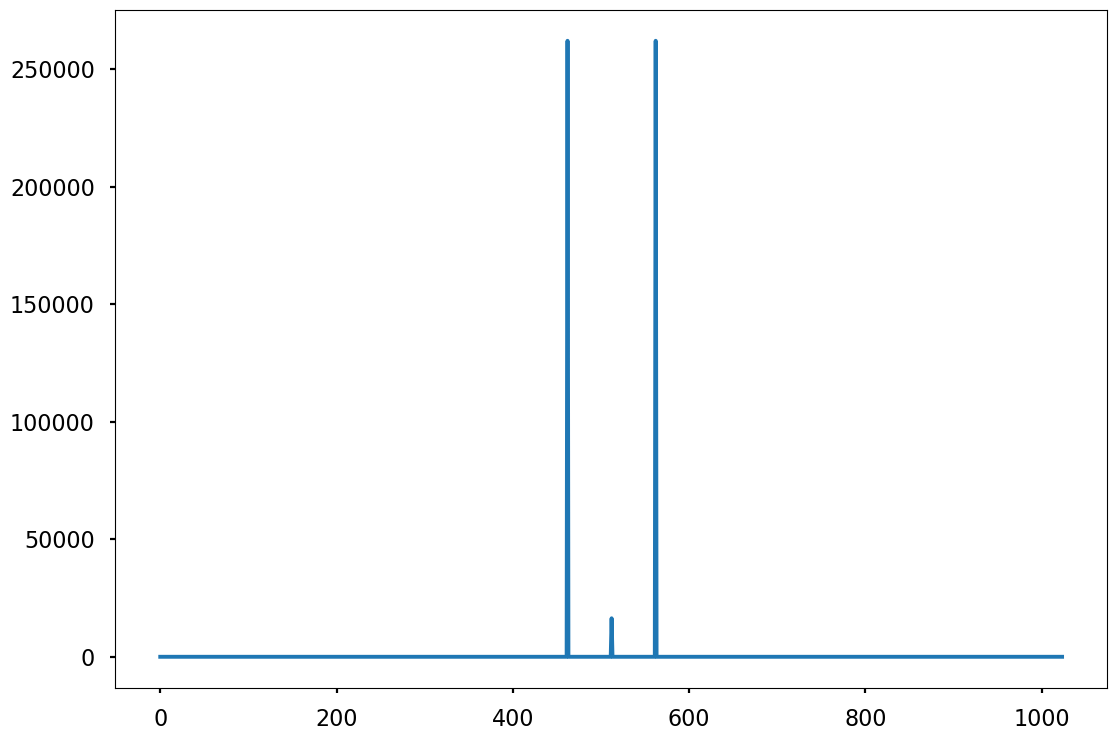

In [4]:
sigma = 5

y[t] = np.exp(- (t - N)/2) ** 2/(2 * sigma * sigma)
pspec = np.fft.fftshift(pspec)
plt.plot(pspec)
plt.show()
 # don't know what this is.
    

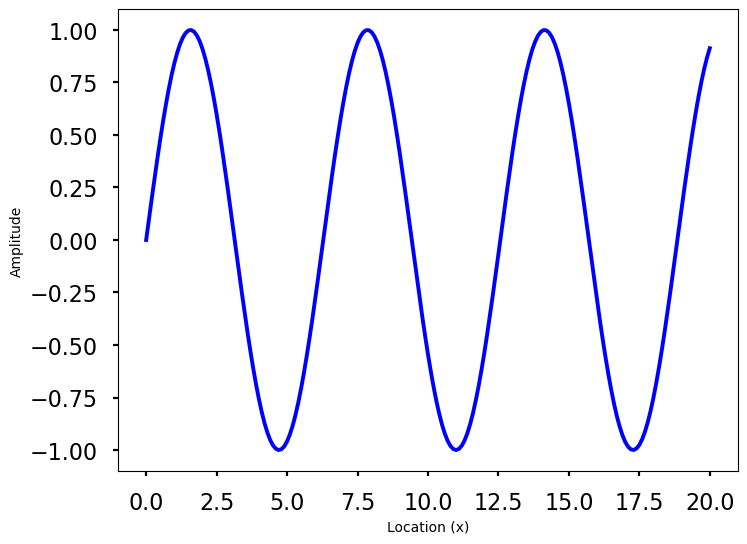

In [5]:
x = np.linspace(0, 20, 201)
y = np.sin(x)

plt.figure(figsize = (8, 6))
plt.plot(x, y, 'b')
plt.ylabel('Amplitude')
plt.xlabel('Location (x)')
plt.show()

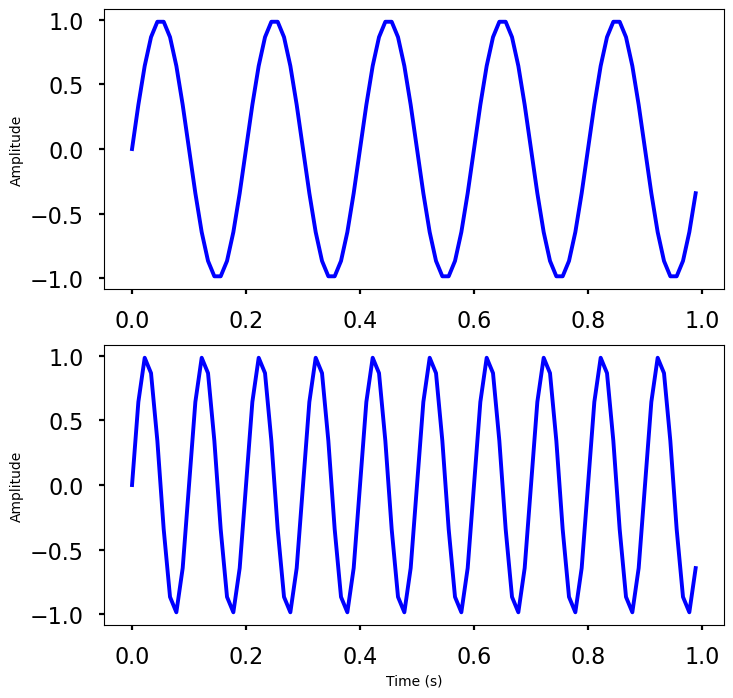

In [6]:
# sampling rate
sr = 90

# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

# frequency of the signal
freq = 5   
y = np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 8))
plt.subplot(211)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

freq = 10   
y = np.sin(2*np.pi*freq*t)

plt.subplot(212)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()

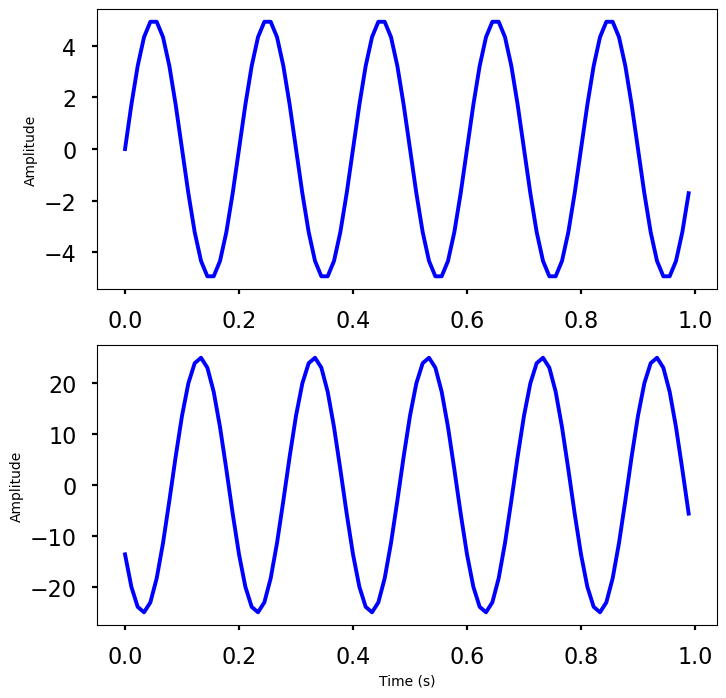

In [7]:
# frequency of the signal
freq = 5   
y = 5*np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 8))
plt.subplot(211)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

y = 25*np.sin(2*np.pi*freq*t + 10)

plt.subplot(212)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()

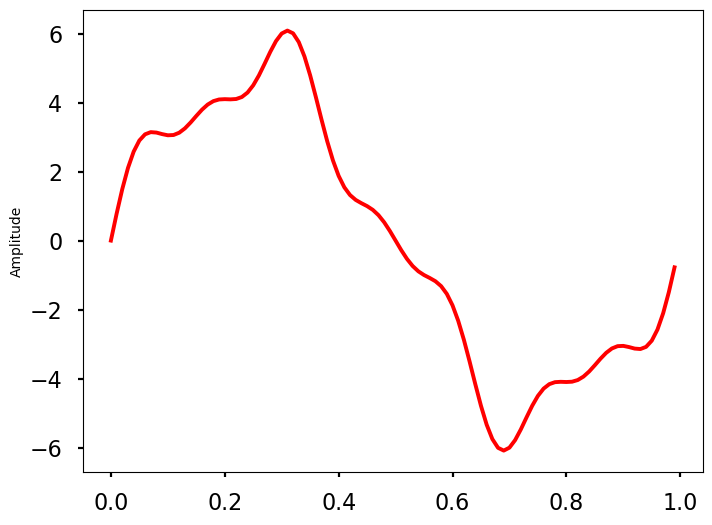

In [8]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 5*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

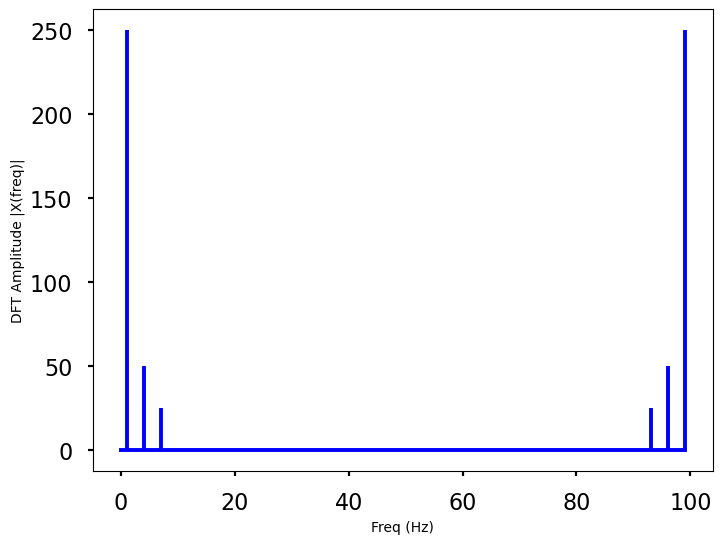

In [9]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

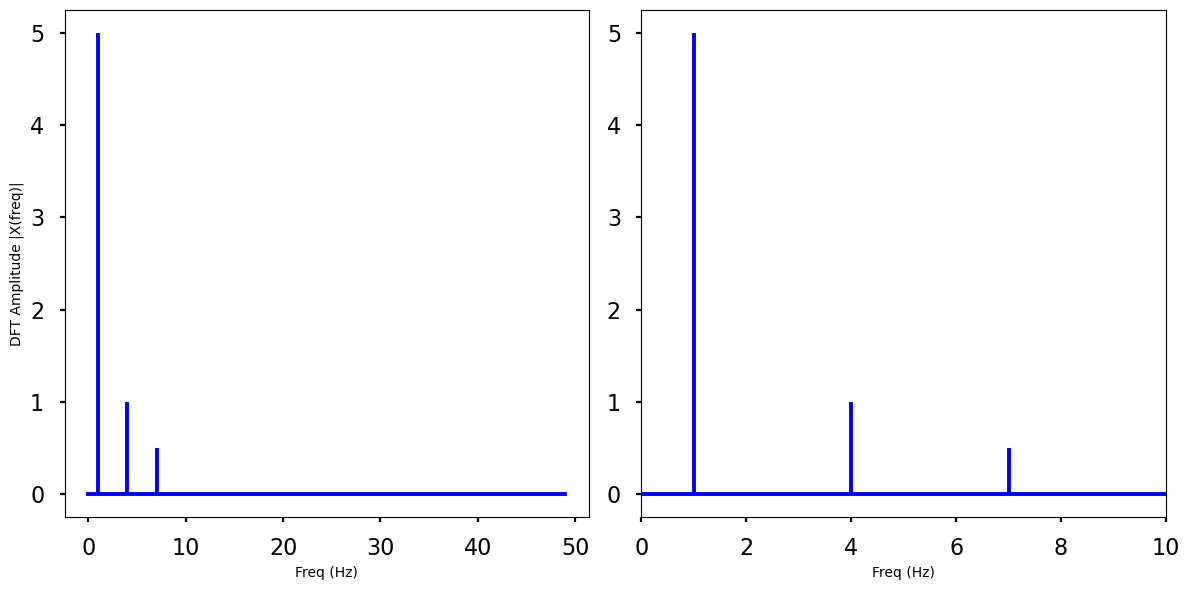

In [10]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

In [11]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x
# sampling rate =2000
sr = 2000
%timeit DFT(gen_sig(sr))
# sampling rate 20000
sr = 20000
%timeit DFT(gen_sig(sr))

97.4 ms ± 3.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
11.2 s ± 415 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

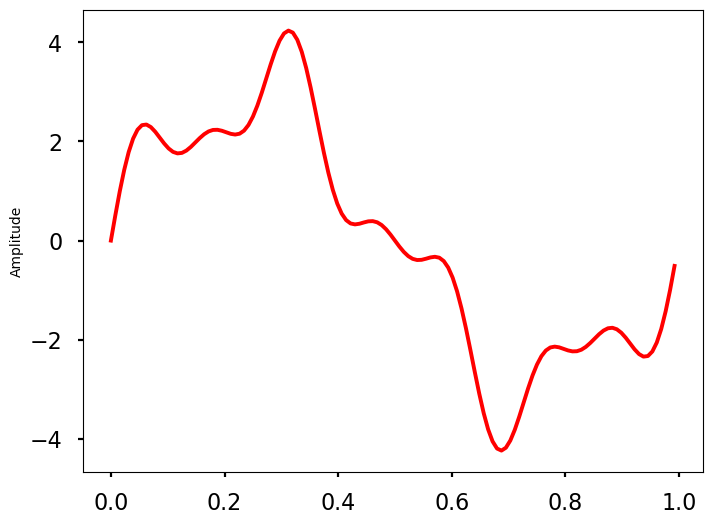

In [13]:
# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

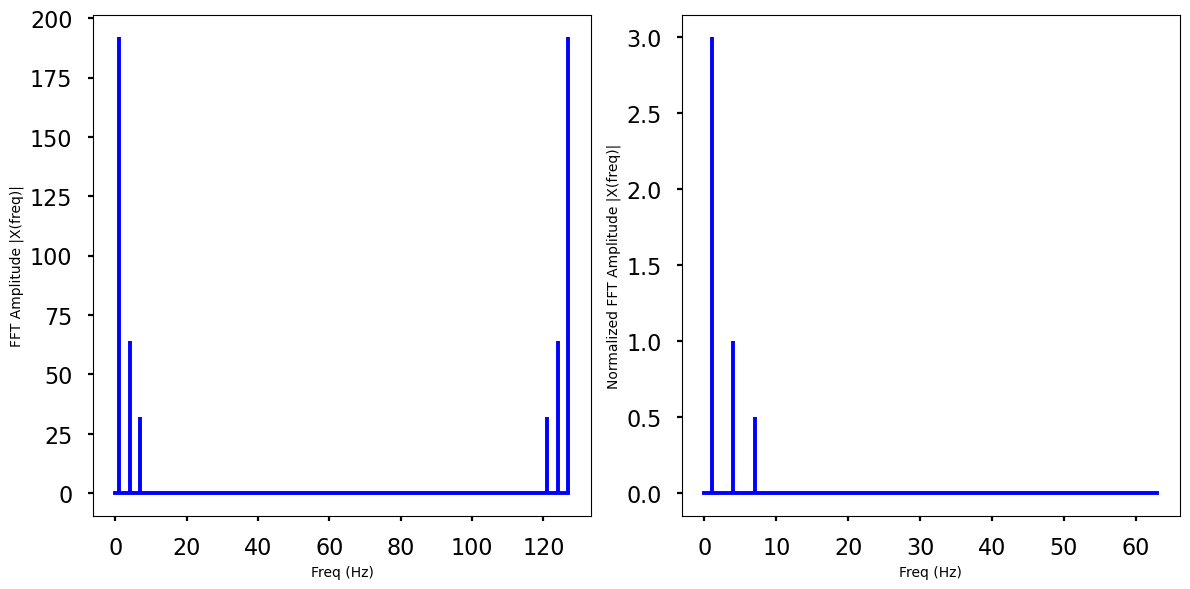

In [14]:
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

In [15]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

# sampling rate =2048
sr = 2048
%timeit FFT(gen_sig(sr))

13.5 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


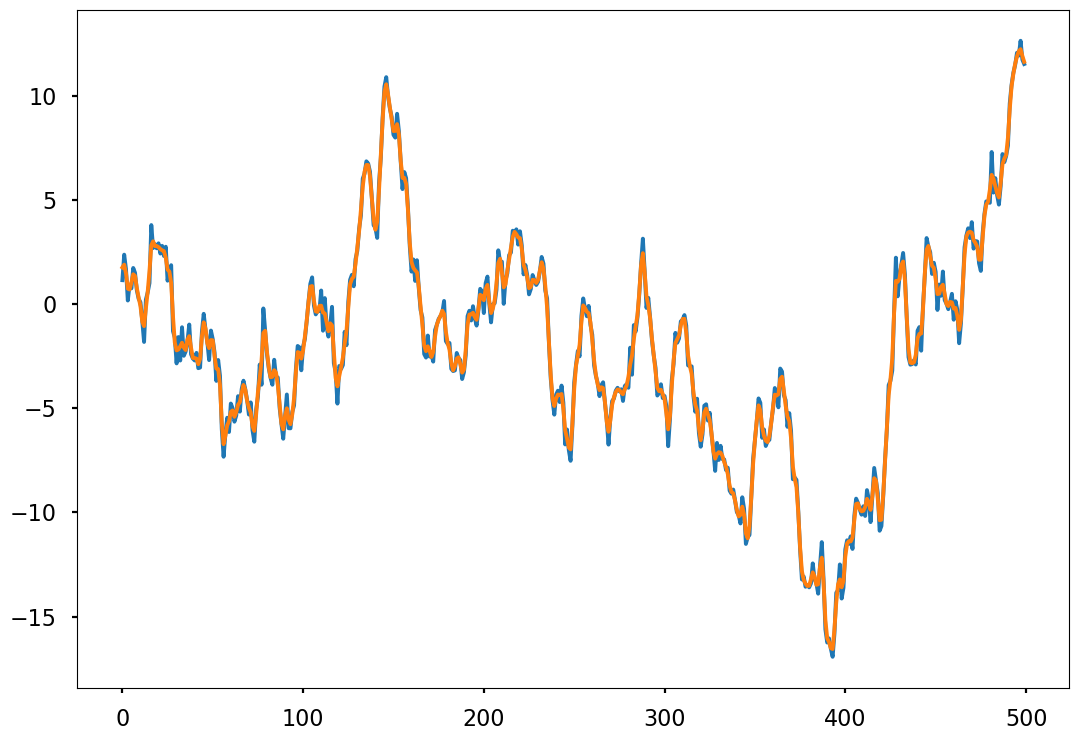

In [16]:
nvals = 500
y = np.zeros(nvals) 
smoothed_y = np.zeros(nvals) 
x = np.zeros(nvals)


for i in range (nvals): 
    x[i]=i

y[0] = np.random.normal(0, 1., None) 


for i in range (1, nvals):
    y[i] = y[i - 1] + np.random.normal(0, 1., None)

    
for i in range (1, nvals - 1):
    smoothed_y[i] = 0.25*y[i - 1] + 0.5*y[i] + 0.25*y[i + 1]


# take care of beginning and end
smoothed_y[0] = 0.5*y[0] + 0.5*y[1]
smoothed_y[nvals - 1] = 0.5*y[nvals - 1] + 0.5*y[nvals - 2]

plt.plot(x, y)
plt.plot(x, smoothed_y) 
plt.show()

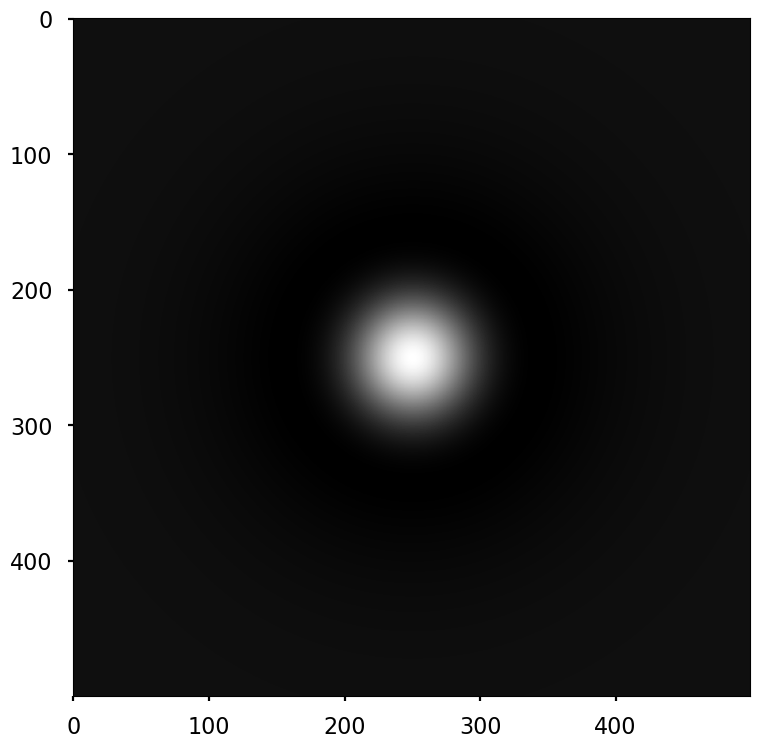

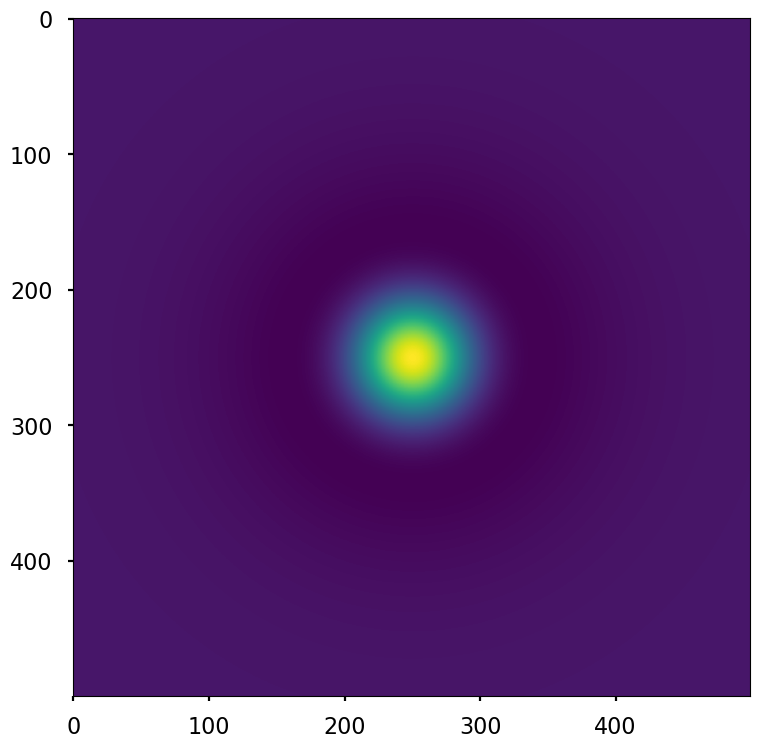

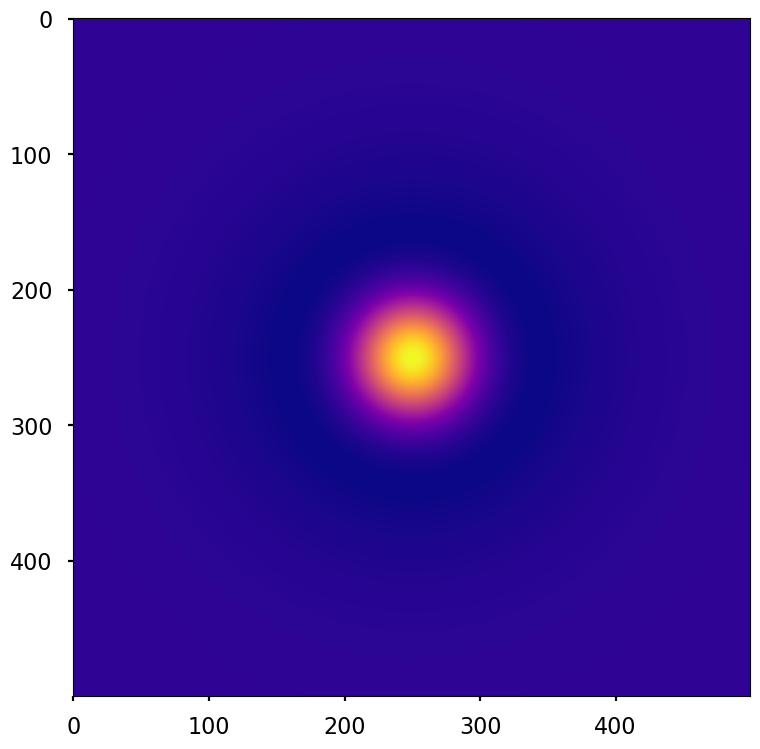

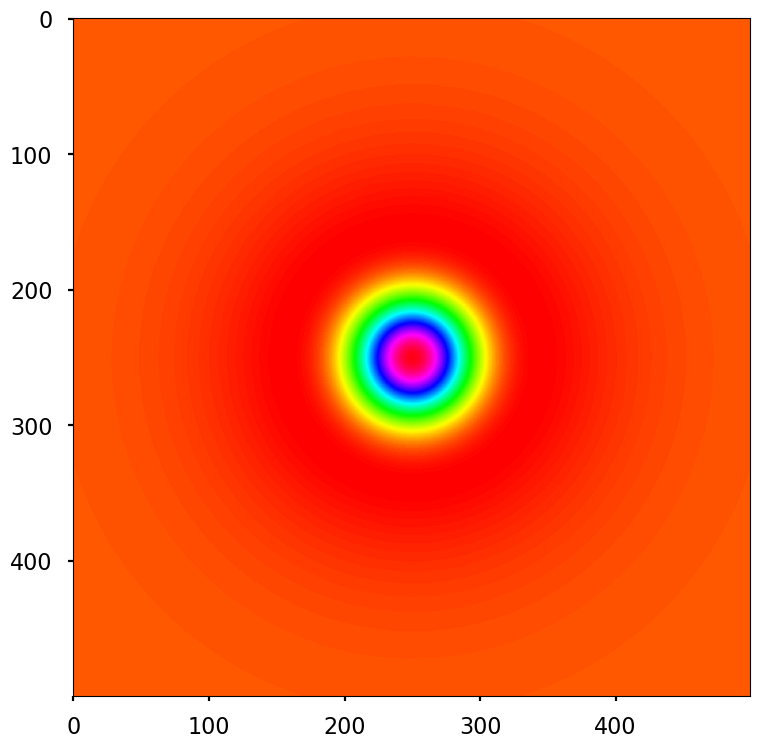

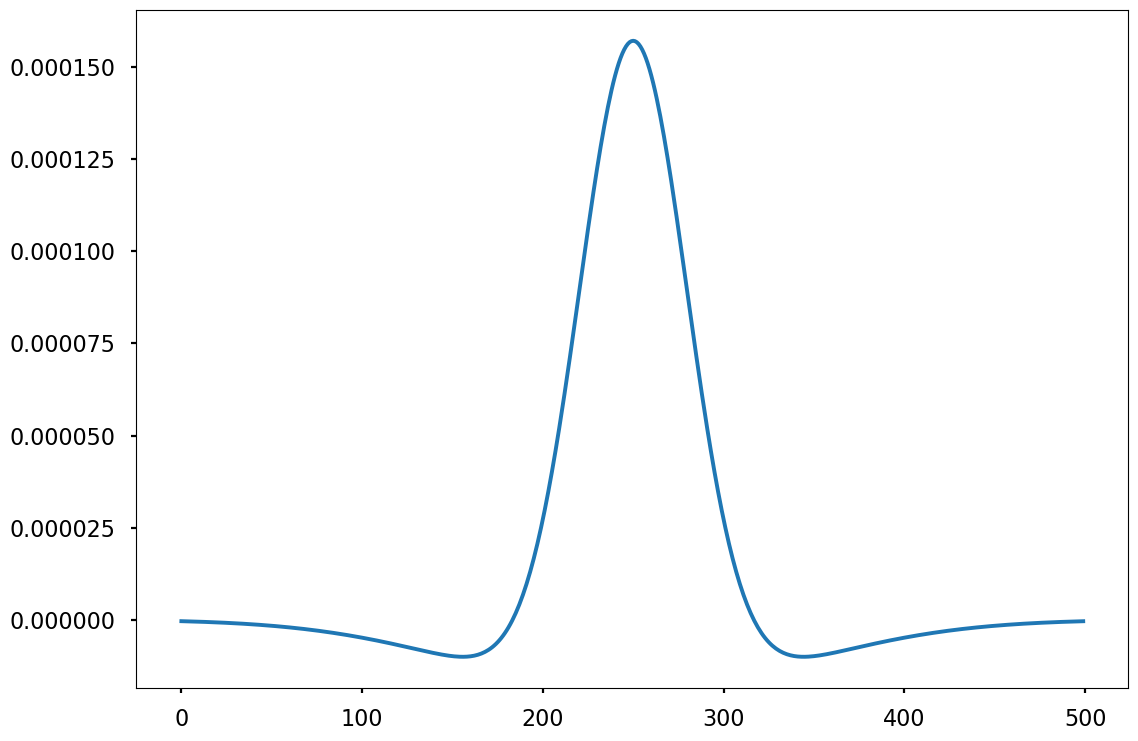

In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt

def Gaussian(r:float, sigma:float):
    s2 = 2*sigma*sigma
    Gaussian = math.exp(-r**2/s2)
    return Gaussian

image = np.zeros((500, 500))
x0 = 250
y0 = 250
sigma1 = 30
sigma2 = 90

# normalising factors for each Gaussian
E = 1/(2*np.pi*sigma1**2)
I = 1/(2*np.pi*sigma2**2)
for i in range (0, 500):
    for j in range (0,500):
        x = i - x0
        y = j - y0
        r = np.sqrt(x*x + y*y)
        image[i, j] = E*Gaussian(r, sigma1) - I*Gaussian(r, sigma2)
    
    
plt.imshow(image, cmap = 'gray')
plt.show()
plt.imshow(image, cmap = 'viridis')
plt.show()
plt.imshow(image, cmap = 'plasma')
plt.show()
plt.imshow(image, cmap = 'hsv')
plt.show()
# plot a 1D cross section to confirm
xvals = list(range(500))
plt.plot(xvals, image[:, 250])
plt.show()
